# Exploratory Data Analysis

Step1: Import Basic Libraries

In [3]:
#basic libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Step2: Load Data

In [4]:
conn = sqlite3.connect("data/us_gun_violence_with_economy.db")
gun_violence_df = pd.read_sql_query("SELECT * FROM Gun_violence_data", conn)
gdp_by_state_df = pd.read_sql_query("SELECT * FROM US_State_GDP_data", conn)
gdp_per_capita_df = pd.read_sql_query("SELECT * FROM GDP_Per_Capita_data", conn)

In [5]:
gun_violence_df.head()

,Date,State,City/County,Address,No_of_Killed,No_of_Injured,Congressional_District,Incident_Characteristics,No_Guns_Involved,Notes,Participant_Age,Participant_Age_Group,Participant_Gender
0,2013-03-13,New York,Mohawk,17 W Main St,6,2,22.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",1.0,"4 victims in Mohawk, 2 more in Herkimer- Gaffe...",0::68||1::57||2::66||3::67||4::62||5::51||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...
1,2013-05-23,Tennessee,Bean Station,1034 Main Street,2,2,2.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",1.0,ms; 2 dead; 2 wounded. Pharmacy robbery by ex ...,1::72||2::45||4::37,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||3::Female||4::Male
2,2013-06-15,Tennessee,Nashville,135 Brinkhaven Ave,0,4,5.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,1.0,dv; 4 inj; non life-threatening injuries. Perp...,0::34||1::14||2::14||3::15||4::39,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Female||1::Female||2::Female||3::Female||4:...
3,2013-08-25,Florida,Lake Butler,1050 Southeast 6th Street,4,1,3.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",3.0,Suspect had either been fired or had retired a...,0::28||1::80||2::66||3::44||4::72,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male
4,2013-09-19,Illinois,Chicago,1809 W 50th St,0,12,3.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,1.0,"Sources said the ""Brick Squad"" gang faction, a...",0::3||1::17||2::15||3::27||4::24||5::21||6::41...,0::Child 0-11||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Female||2::Male||3::Male||4::Male|...


Step3: Data Inspection

Basic checks on Gun violence dataset

In [7]:
gun_violence_df.shape

(1059, 13)

In [9]:
gun_violence_df.dtypes

Date                         object
State                        object
City/County                  object
Address                      object
No_of_Killed                  int64
No_of_Injured                 int64
Congressional_District      float64
Incident_Characteristics     object
No_Guns_Involved            float64
Notes                        object
Participant_Age              object
Participant_Age_Group        object
Participant_Gender           object
dtype: object

In [11]:
gun_violence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1059 non-null   object 
 1   State                     1059 non-null   object 
 2   City/County               1059 non-null   object 
 3   Address                   1059 non-null   object 
 4   No_of_Killed              1059 non-null   int64  
 5   No_of_Injured             1059 non-null   int64  
 6   Congressional_District    1059 non-null   float64
 7   Incident_Characteristics  1059 non-null   object 
 8   No_Guns_Involved          1059 non-null   float64
 9   Notes                     1059 non-null   object 
 10  Participant_Age           1059 non-null   object 
 11  Participant_Age_Group     1059 non-null   object 
 12  Participant_Gender        1059 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 107.7+ KB


In [12]:
gun_violence_df.describe()

,No_of_Killed,No_of_Injured,Congressional_District,No_Guns_Involved
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.741265,0.512748,8.562795,1.197356
std,0.836946,0.811413,8.860640,1.459521
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,3.000000,1.000000
50%,1.000000,0.000000,5.000000,1.000000
75%,1.000000,1.000000,11.000000,1.000000
max,6.000000,12.000000,53.000000,35.000000


In [13]:
gun_violence_df.describe(include='object')

,Date,State,City/County,Address,Incident_Characteristics,Notes,Participant_Age,Participant_Age_Group,Participant_Gender
count,1059,1059,1059,1059,1059,1059,1059,1059,1059
unique,655,47,584,1056,573,1036,754,70,72
top,2017-07-20,Florida,Chicago,6200 Lee Hwy,"Shot - Dead (murder, accidental, suicide)",1 killed. Armed robbery.,0::22,0::Adult 18+||1::Adult 18+,0::Male||1::Male
freq,7,125,23,2,52,4,11,544,338


In [14]:
gun_violence_df.nunique()

Date                         655
State                         47
City/County                  584
Address                     1056
No_of_Killed                   7
No_of_Injured                  8
Congressional_District        48
Incident_Characteristics     573
No_Guns_Involved               9
Notes                       1036
Participant_Age              754
Participant_Age_Group         70
Participant_Gender            72
dtype: int64

In [15]:
gun_violence_df.duplicated().sum()

0

In [67]:
gdp_by_state_df.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,Unit,GeoName
0,8577552.0,9062817.0,9630663.0,10252347.0,10581822.0,10936418.0,11458246.0,12213730.0,13036637.0,13814609.0,...,16197007.0,16784851.0,17527258.0,18238301.0,18745075.0,19542980.0,20611861.0,21433226.0,Millions of current dollars,United States *
1,7431992.0,7871500.0,8378315.0,8929320.0,9188887.0,9462020.0,9905899.0,10582459.0,11326369.0,12022614.0,...,14037519.0,14572341.0,15255889.0,15898859.0,16360179.0,17094245.0,18062184.0,18793750.0,Millions of current dollars,United States *
2,108637.0,99756.0,92590.0,98312.0,99836.0,95629.0,113953.0,142945.0,128347.0,125130.0,...,179573.0,215601.0,201003.0,182283.0,166571.0,176625.0,178569.0,175373.0,Millions of current dollars,United States *
3,88136.0,79030.0,70934.0,76043.0,78093.0,74033.0,91105.0,119356.0,104459.0,96264.0,...,148939.0,184621.0,168147.0,147384.0,130639.0,140053.0,140271.0,136080.0,Millions of current dollars,United States *
4,20501.0,20726.0,21656.0,22269.0,21743.0,21596.0,22848.0,23589.0,23888.0,28866.0,...,30634.0,30980.0,32856.0,34899.0,35932.0,36571.0,38298.0,39293.0,Millions of current dollars,United States *


In [17]:
gdp_by_state_df.shape

(5524, 25)

In [18]:
gdp_by_state_df.columns

Index(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', 'Unit', 'GeoName'],
      dtype='object')

In [19]:
gdp_by_state_df.dtypes

1997        object
1998        object
1999        object
2000        object
2001        object
2002        object
2003        object
2004        object
2005        object
2006        object
2007        object
2008        object
2009        object
2010        object
2011        object
2012        object
2013        object
2014        object
2015        object
2016        object
2017        object
2018       float64
2019        object
Unit        object
GeoName     object
dtype: object

Convert the object columns to float

In [6]:
year_columns = [str(year) for year in range(1997, 2020)]  # or the appropriate range
gdp_by_state_df[year_columns] = gdp_by_state_df[year_columns].apply(pd.to_numeric, errors='coerce')

In [69]:
gdp_by_state_df.dtypes

1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
Unit        object
GeoName     object
dtype: object

In [70]:
gdp_by_state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5524 entries, 0 to 5523
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1997     5522 non-null   float64
 1   1998     5521 non-null   float64
 2   1999     5521 non-null   float64
 3   2000     5521 non-null   float64
 4   2001     5520 non-null   float64
 5   2002     5522 non-null   float64
 6   2003     5522 non-null   float64
 7   2004     5522 non-null   float64
 8   2005     5521 non-null   float64
 9   2006     5521 non-null   float64
 10  2007     5521 non-null   float64
 11  2008     5521 non-null   float64
 12  2009     5520 non-null   float64
 13  2010     5521 non-null   float64
 14  2011     5520 non-null   float64
 15  2012     5522 non-null   float64
 16  2013     5523 non-null   float64
 17  2014     5523 non-null   float64
 18  2015     5523 non-null   float64
 19  2016     5520 non-null   float64
 20  2017     5521 non-null   float64
 21  2018     5524 

In [71]:
gdp_by_state_df.describe()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,5.522000e+03,5.521000e+03,5.521000e+03,5.521000e+03,5.520000e+03,5.522000e+03,5.522000e+03,5.522000e+03,5.521000e+03,5.521000e+03,...,5.521000e+03,5.520000e+03,5.522000e+03,5.523000e+03,5.523000e+03,5.523000e+03,5.520000e+03,5.521000e+03,5.524000e+03,5.522000e+03
mean,2.538416e+04,2.680886e+04,2.849538e+04,3.031655e+04,3.121505e+04,3.218098e+04,3.369881e+04,3.592871e+04,3.838266e+04,4.069747e+04,...,4.408538e+04,4.581921e+04,4.781587e+04,4.956517e+04,5.178665e+04,5.389055e+04,5.539324e+04,5.780355e+04,6.101470e+04,6.343257e+04
std,1.970157e+05,2.085773e+05,2.220496e+05,2.363597e+05,2.439336e+05,2.519725e+05,2.636545e+05,2.809608e+05,3.003422e+05,3.183528e+05,...,3.445736e+05,3.576168e+05,3.738736e+05,3.875697e+05,4.054474e+05,4.235099e+05,4.366078e+05,4.555436e+05,4.805587e+05,5.005834e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.987750e+02,4.251000e+02,4.366000e+02,4.646000e+02,4.841500e+02,4.932500e+02,5.083250e+02,5.684000e+02,5.999000e+02,6.499000e+02,...,6.786000e+02,6.974250e+02,7.212250e+02,7.592000e+02,7.769000e+02,8.063000e+02,8.113000e+02,8.380000e+02,8.837500e+02,9.099000e+02
50%,1.835200e+03,1.935200e+03,1.997400e+03,2.110600e+03,2.161300e+03,2.243850e+03,2.351050e+03,2.566400e+03,2.707400e+03,2.874600e+03,...,3.136700e+03,3.289500e+03,3.435800e+03,3.565100e+03,3.662300e+03,3.792100e+03,3.789500e+03,3.948800e+03,4.157650e+03,4.280750e+03
75%,8.428500e+03,8.906900e+03,9.400500e+03,1.005190e+04,1.024338e+04,1.045515e+04,1.097880e+04,1.183705e+04,1.273750e+04,1.367010e+04,...,1.477260e+04,1.535123e+04,1.607640e+04,1.632720e+04,1.705500e+04,1.756145e+04,1.815197e+04,1.885880e+04,1.978498e+04,2.059497e+04
max,8.577552e+06,9.062817e+06,9.630663e+06,1.025235e+07,1.058182e+07,1.093642e+07,1.145825e+07,1.221373e+07,1.303664e+07,1.381461e+07,...,1.499205e+07,1.554258e+07,1.619701e+07,1.678485e+07,1.752726e+07,1.823830e+07,1.874508e+07,1.954298e+07,2.061186e+07,2.143323e+07


In [72]:
gdp_by_state_df.nunique()

1997       5153
1998       5182
1999       5178
2000       5196
2001       5203
2002       5185
2003       5230
2004       5234
2005       5265
2006       5264
2007       5281
2008       5288
2009       5285
2010       5254
2011       5290
2012       5285
2013       5310
2014       5300
2015       5314
2016       5268
2017       5310
2018       5321
2019       5337
Unit          1
GeoName      60
dtype: int64

In [27]:
gdp_per_capita_df.head()

,State,2013,2014,2015,2016,2017
0,United States,48534,49329,50301,50660,51337
1,Alabama,36674,36473,36818,37158,37508
2,Alaska,69711,67179,65971,63304,63610
3,Arizona,38352,38534,38787,38940,39583
4,Arkansas,35888,36265,36295,36502,36714


In [28]:
gdp_per_capita_df.describe()

,2013,2014,2015,2016,2017
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,49327.750000,49982.316667,50695.900000,50880.183333,51441.066667
std,16709.083832,16709.138828,16649.753721,16454.119857,16520.084703
min,31952.000000,31635.000000,31714.000000,32334.000000,32447.000000
25%,42107.750000,42359.750000,42872.750000,43622.500000,44311.250000
50%,46685.000000,47037.000000,47812.000000,48291.000000,48850.000000
75%,52274.500000,53358.750000,54315.250000,54941.500000,55420.250000
max,159264.000000,159369.000000,159530.000000,159141.000000,159607.000000


In [29]:
gdp_per_capita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   60 non-null     object
 1   2013    60 non-null     int64 
 2   2014    60 non-null     int64 
 3   2015    60 non-null     int64 
 4   2016    60 non-null     int64 
 5   2017    60 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.9+ KB


Based on the dataset we choose to look into the years from 2013 to 2017

In [14]:
gun_violence_df['Date'] = pd.to_datetime(gun_violence_df['Date'])
gun_violence_df['Year'] = gun_violence_df['Date'].dt.year

In [27]:
# Drop the 'Unit' column from GDP by state data before melting
gdp_by_state_df_cleaned = gdp_by_state_df.drop(columns=['Unit'])

gun_violence_df['Year'] = pd.to_datetime(gun_violence_df['Date'], format='%Y')


# Melt the data to transform year columns into rows
gun_violence_yearly = gdp_by_state_df_cleaned.melt(id_vars=['GeoName'], var_name='Year', value_name='GDP')

# Ensure the 'Year' column is of datetime type
gun_violence_yearly['Year'] = pd.to_datetime(gun_violence_yearly['Year'], format='%Y')

# Continue with the merging and analysis
merged_df = pd.merge(gun_violence_df, gun_violence_yearly, on='Year', how='inner')


# Correlation analysis
correlation = merged_df[['No_of_Killed', 'GDP']].corr()
print("Correlation between gun violence and GDP:", correlation)

Correlation between gun violence and GDP:               No_of_Killed       GDP
No_of_Killed      1.000000 -0.004093
GDP              -0.004093  1.000000


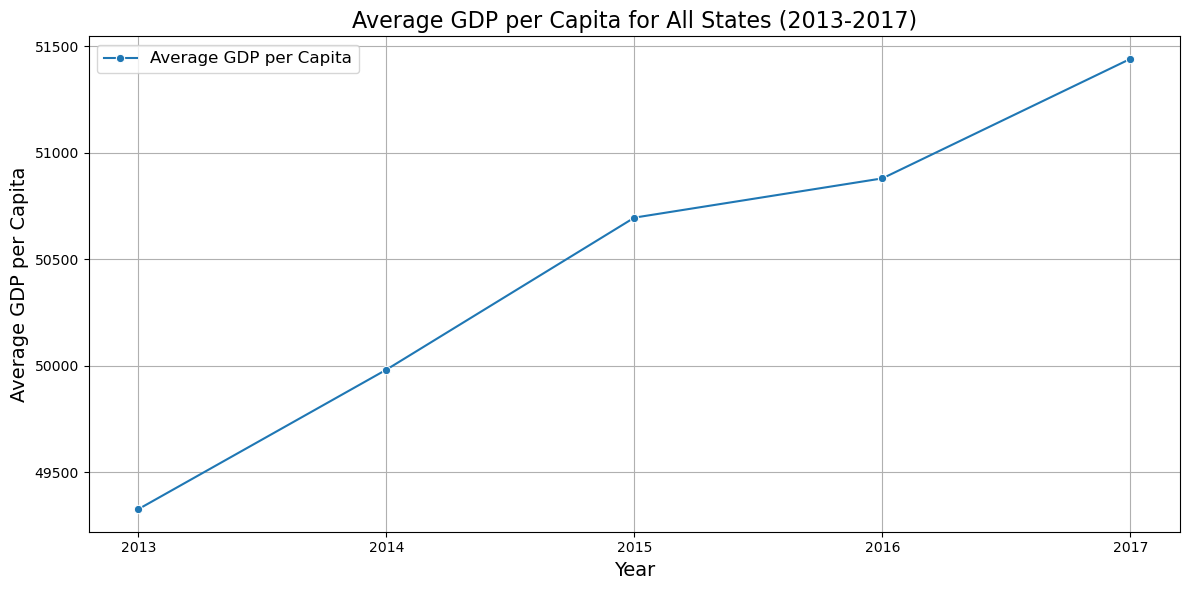

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to long format
gdp_per_capita_melted = gdp_per_capita_df.melt(
    id_vars=["State"], 
    var_name="Year", 
    value_name="GDP_per_Capita"
)

# Convert 'Year' column to integer for grouping
gun_violence_yearly["Year"] = gdp_per_capita_melted["Year"].astype(int)

# Calculate the average GDP per capita for all states per year
average_gdp_per_capita = gdp_per_capita_melted.groupby("Year")["GDP_per_Capita"].mean().reset_index()

# Plot the average GDP per capita trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_gdp_per_capita, x="Year", y="GDP_per_Capita", marker="o", label="Average GDP per Capita")
plt.title("Average GDP per Capita for All States (2013-2017)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average GDP per Capita", fontsize=14)
plt.grid(visible=True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


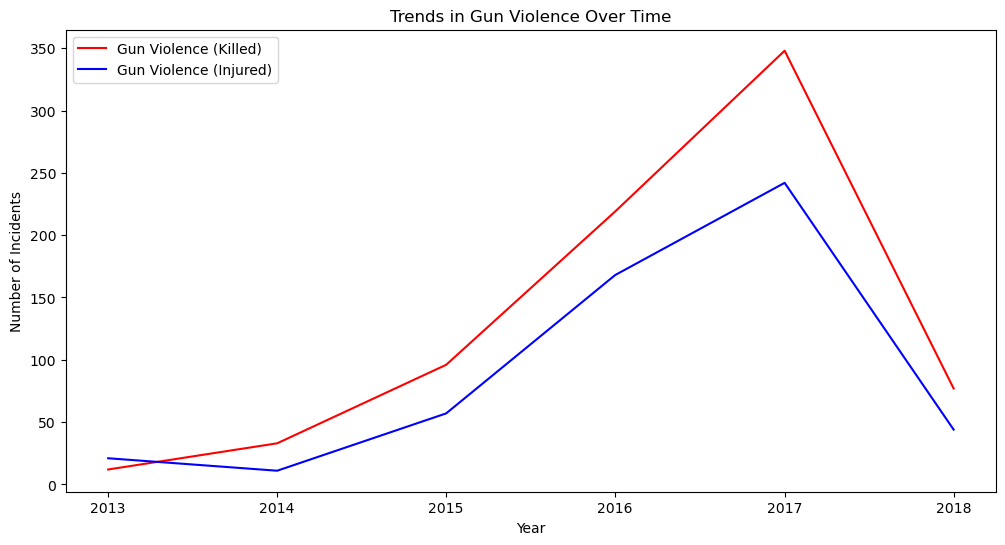

In [74]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=gun_violence_yearly, x='Year', y='No_of_Killed', label='Gun Violence (Killed)', color='red')
sns.lineplot(data=gun_violence_yearly, x='Year', y='No_of_Injured', label='Gun Violence (Injured)', color='blue')
plt.title("Trends in Gun Violence Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend()
plt.show()

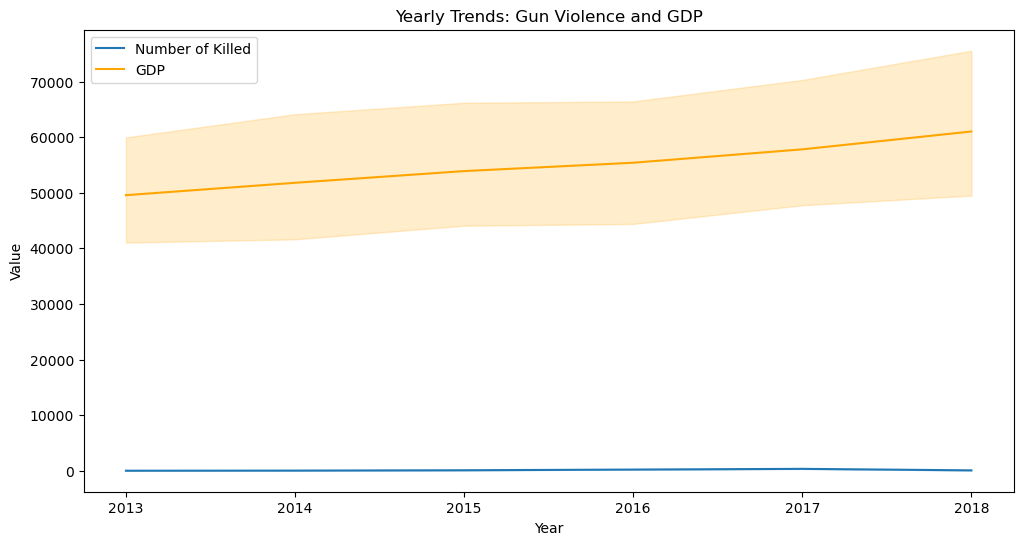

In [75]:
# Plotting the correlation between GDP and gun violence
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Year', y='No_of_Killed', label='Number of Killed')
sns.lineplot(data=merged_df, x='Year', y='GDP', label='GDP', color='orange')
plt.title("Yearly Trends: Gun Violence and GDP")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()


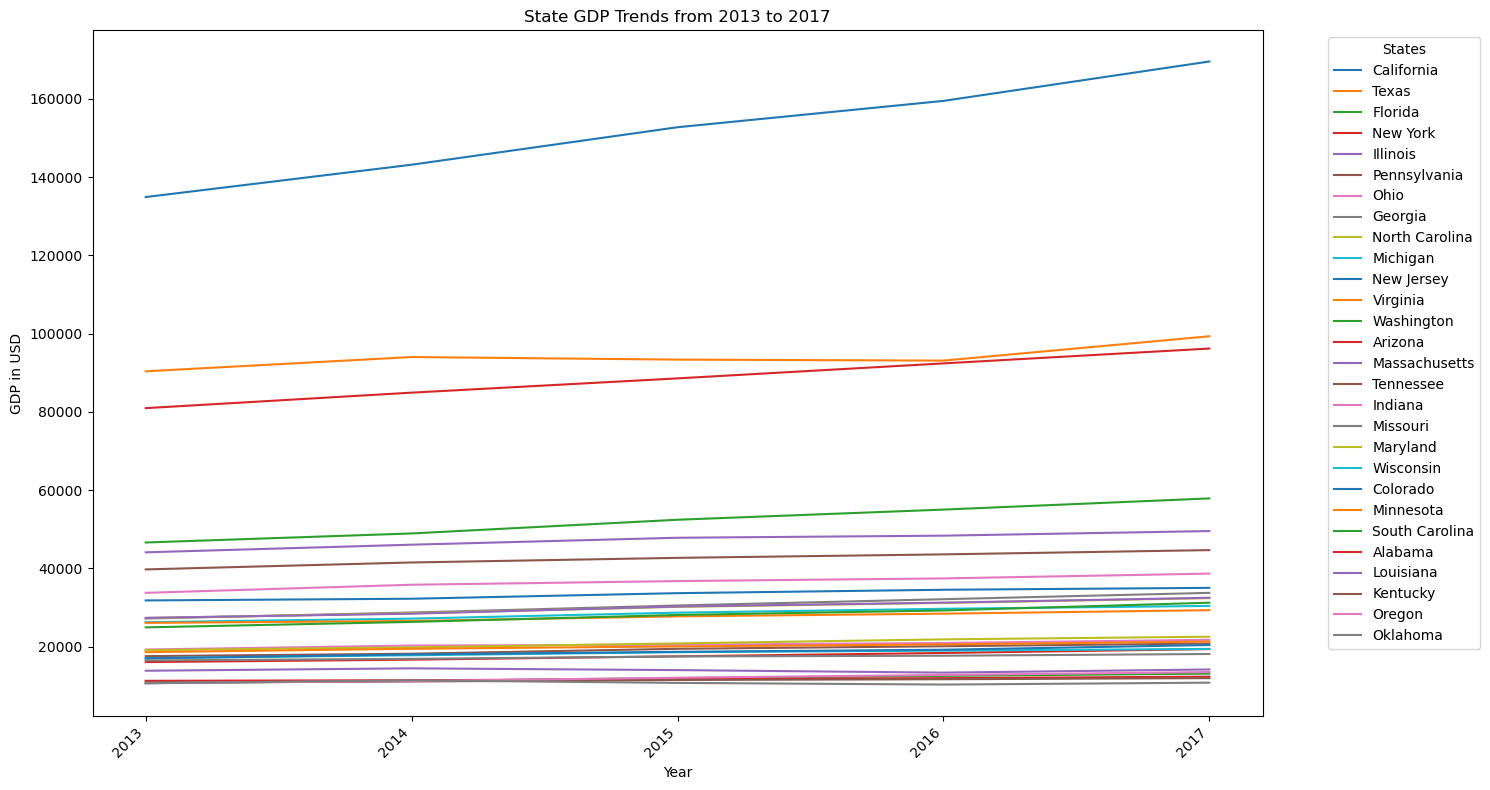

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample list of states you want to plot
selected_states = selected_states = [
    'California', 'Texas', 'Florida', 'New York', 'Illinois', 'Pennsylvania', 'Ohio', 
    'Georgia', 'North Carolina', 'Michigan', 'New Jersey', 'Virginia', 'Washington', 
    'Arizona', 'Massachusetts', 'Tennessee', 'Indiana', 'Missouri', 'Maryland', 'Wisconsin',
    'Colorado', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana', 'Kentucky', 'Oregon', 
    'Oklahoma', 
]  # Add states of your choice

# Make sure 'GeoName' column is of string type (if not already)
gdp_by_state_df['GeoName'] = gdp_by_state_df['GeoName'].astype(str)

# Extract year columns
years = ['2013', '2014', '2015', '2016', '2017']  # List of years from 2013 to 2017

# Plotting for the selected states
plt.figure(figsize=(15, 8))  # Set the figure size

# Loop through the selected states
for state in selected_states:
    if state in gdp_by_state_df['GeoName'].values:  # Check if the state exists in the dataset
        # Extract data for each state
        state_data = gdp_by_state_df[gdp_by_state_df['GeoName'] == state]
        
        # Calculate the mean GDP for each year (if there are multiple rows per state)
        state_gdp = state_data[years].mean().values  # Take the mean of the GDP values for each year
        
        # Plotting the GDP trend for the state
        plt.plot(years, state_gdp, label=state)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('GDP in USD')
plt.title('State GDP Trends from 2013 to 2017')
plt.xticks(rotation=45, ha='right')
plt.legend(title="States", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust layout for better fitting
plt.show()


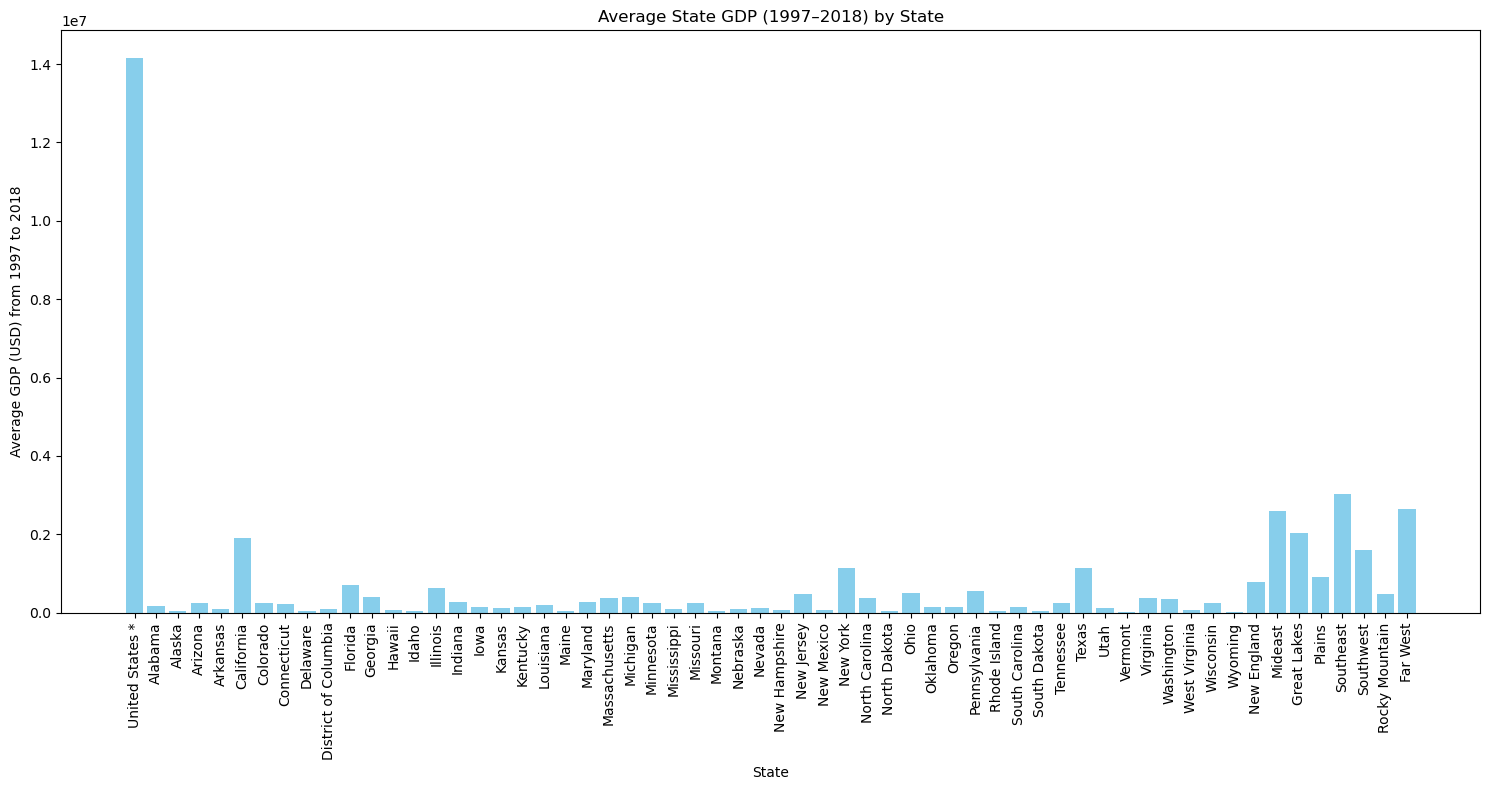

In [121]:
import matplotlib.pyplot as plt

# Make sure 'GeoName' column is of string type (if not already)
gdp_by_state_df['GeoName'] = gdp_by_state_df['GeoName'].astype(str)

# Extract years from 1997 to 2018
years = [str(year) for year in range(1997, 2019)]  # List of years from 1997 to 2018

# Calculate the average GDP for each state from 1997 to 2018
gdp_by_state_df['Average_GDP'] = gdp_by_state_df[years].mean(axis=1)

# Set up the figure
plt.figure(figsize=(15, 8))  # Set the figure size

# Plotting the average GDP by state as a bar chart
plt.bar(gdp_by_state_df['GeoName'], gdp_by_state_df['Average_GDP'], color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Average GDP (USD) from 1997 to 2018')
plt.title('Average State GDP (1997–2018) by State')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


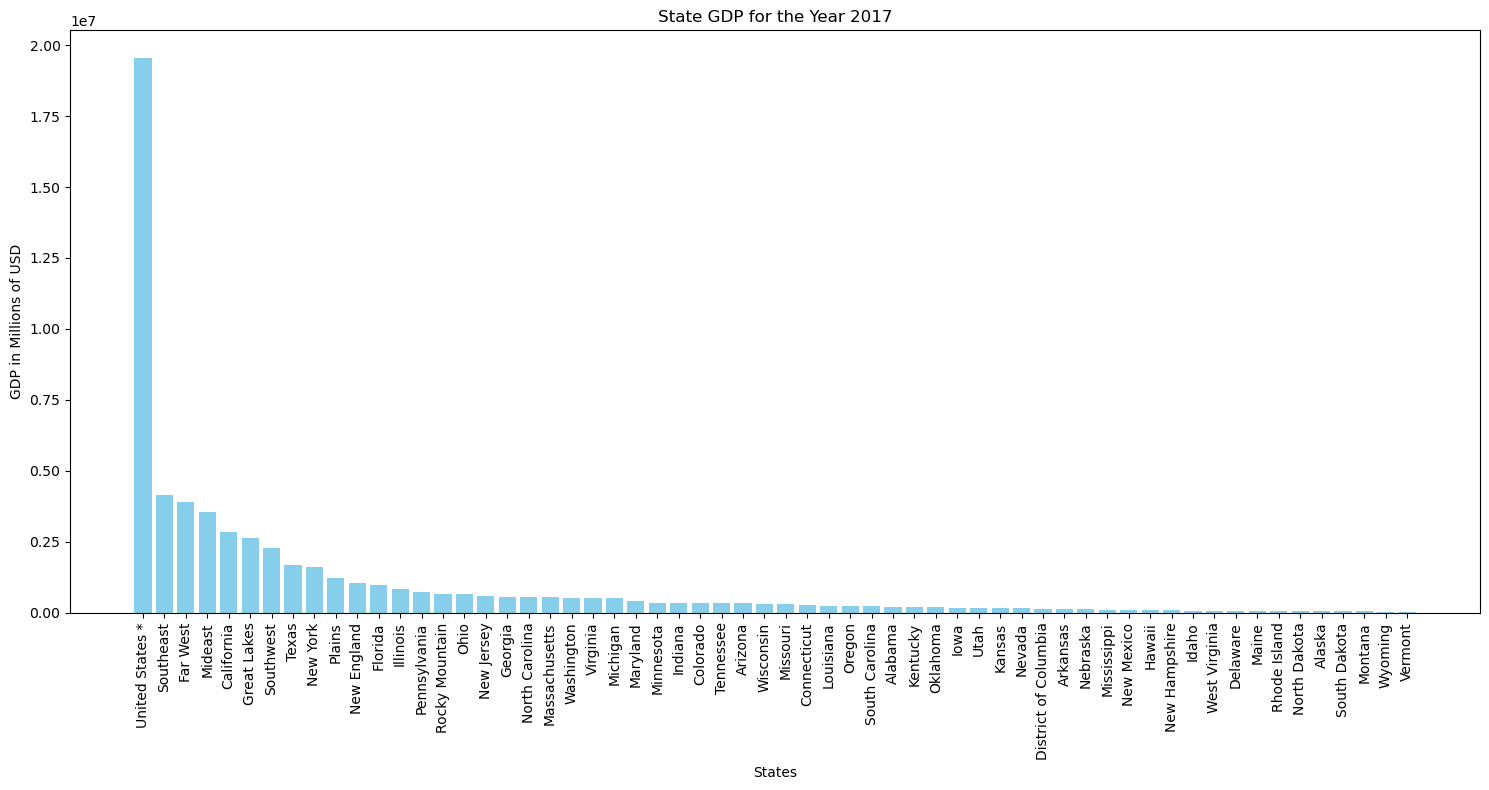

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data - assuming 'gdp_by_state_df' already contains the transformed data
year = '2017'  # Specify the year you want to plot
states = gdp_by_state_df['GeoName'].unique()

# Extract GDP data for the specific year (2017)
gdp_2017 = gdp_by_state_df[gdp_by_state_df['GeoName'].isin(states)][['GeoName', year]]

# Sort by GDP values to better visualize
gdp_2017_sorted = gdp_2017.sort_values(by=year, ascending=False)

# Set up the figure
plt.figure(figsize=(15, 8))

# Plot a bar graph for each state with its GDP for the year 2017
plt.bar(gdp_2017_sorted['GeoName'], gdp_2017_sorted[year], color='skyblue')

# Add labels and title
plt.xlabel('States')
plt.ylabel('GDP in Millions of USD')
plt.title(f'State GDP for the Year {year}')
plt.xticks(rotation=90)  # Rotate state names for readability

# Display the plot
plt.tight_layout()
plt.show()


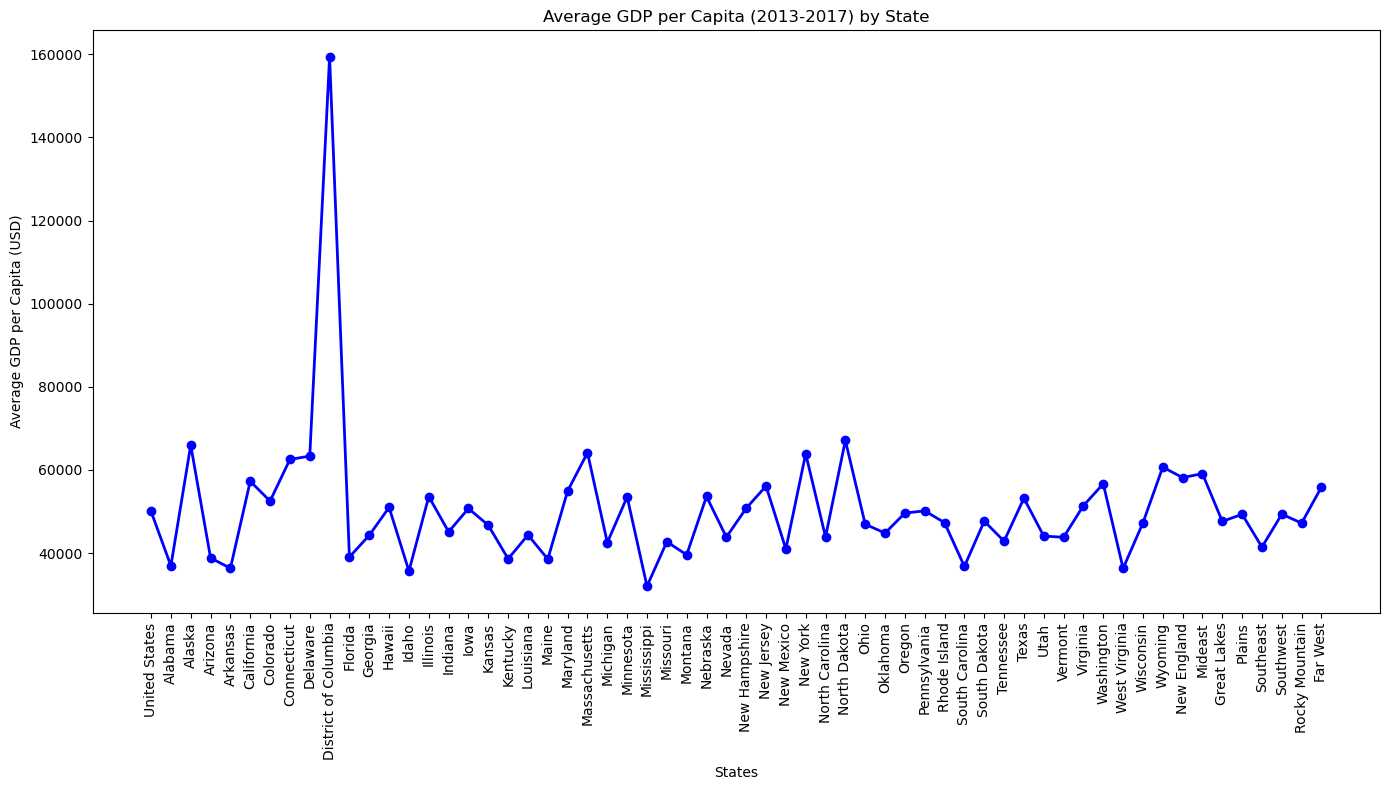

In [97]:
import matplotlib.pyplot as plt

# Calculate the average GDP per capita for each state (2013 to 2017)
gdp_per_capita_df['Average_GDP'] = gdp_per_capita_df[['2013', '2014', '2015', '2016', '2017']].mean(axis=1)

# Set up the figure
plt.figure(figsize=(14, 8))

# Plot the line graph
plt.plot(gdp_per_capita_df['State'], gdp_per_capita_df['Average_GDP'], marker='o', color='b', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('States')
plt.ylabel('Average GDP per Capita (USD)')
plt.title('Average GDP per Capita (2013-2017) by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


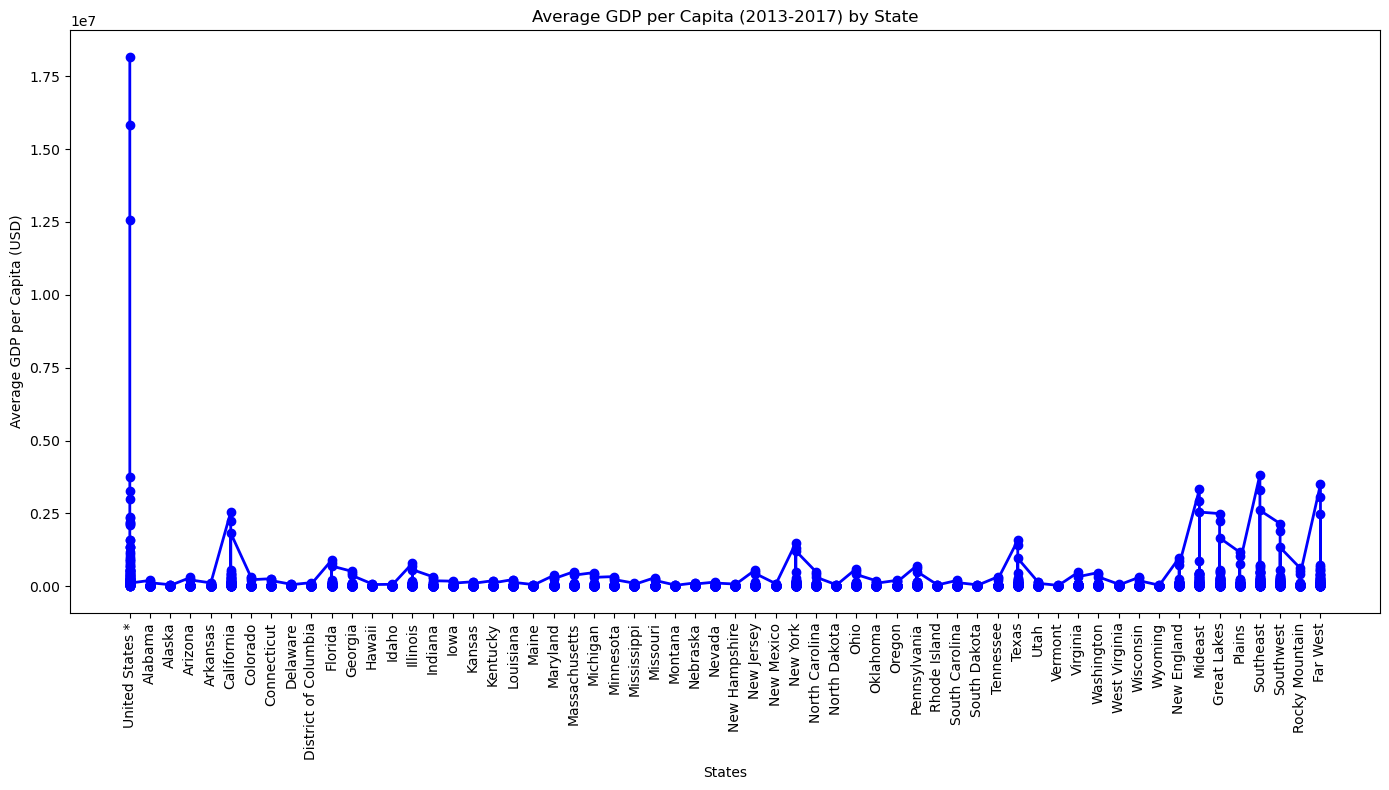

In [122]:
# Calculate the average GDP per capita for each state (2013 to 2017)
gdp_by_state_df['Average_GDP'] = gdp_by_state_df[['2013', '2014', '2015', '2016', '2017']].mean(axis=1)

# Set up the figure
plt.figure(figsize=(14, 8))

# Plot the line graph
plt.plot(gdp_by_state_df['GeoName'], gdp_by_state_df['Average_GDP'], marker='o', color='b', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('States')
plt.ylabel('Average GDP per Capita (USD)')
plt.title('Average GDP per Capita (2013-2017) by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

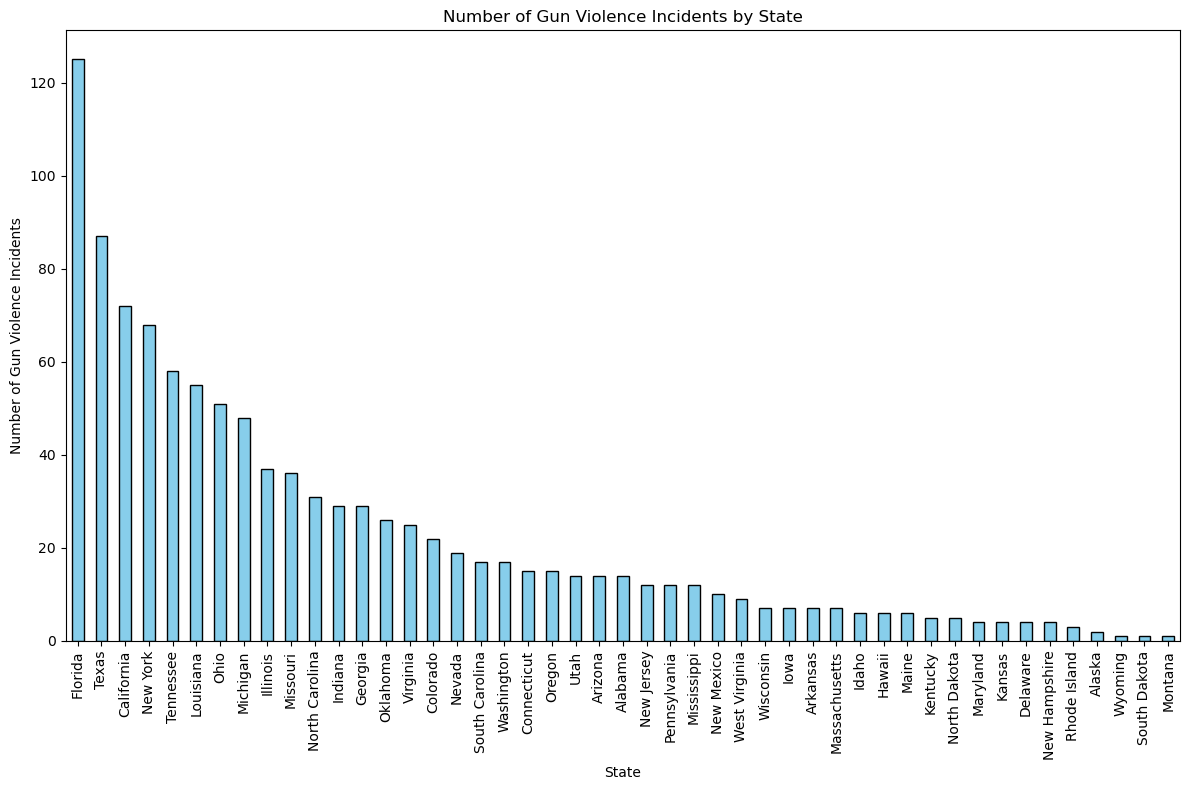

In [136]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'gun_violence_df' has been loaded and transformed properly
# You can group by 'State' and count the number of incidents

# Count the number of incidents per state
state_incidents = gun_violence_df['State'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 8))
state_incidents.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Number of Gun Violence Incidents')
plt.title('Number of Gun Violence Incidents by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


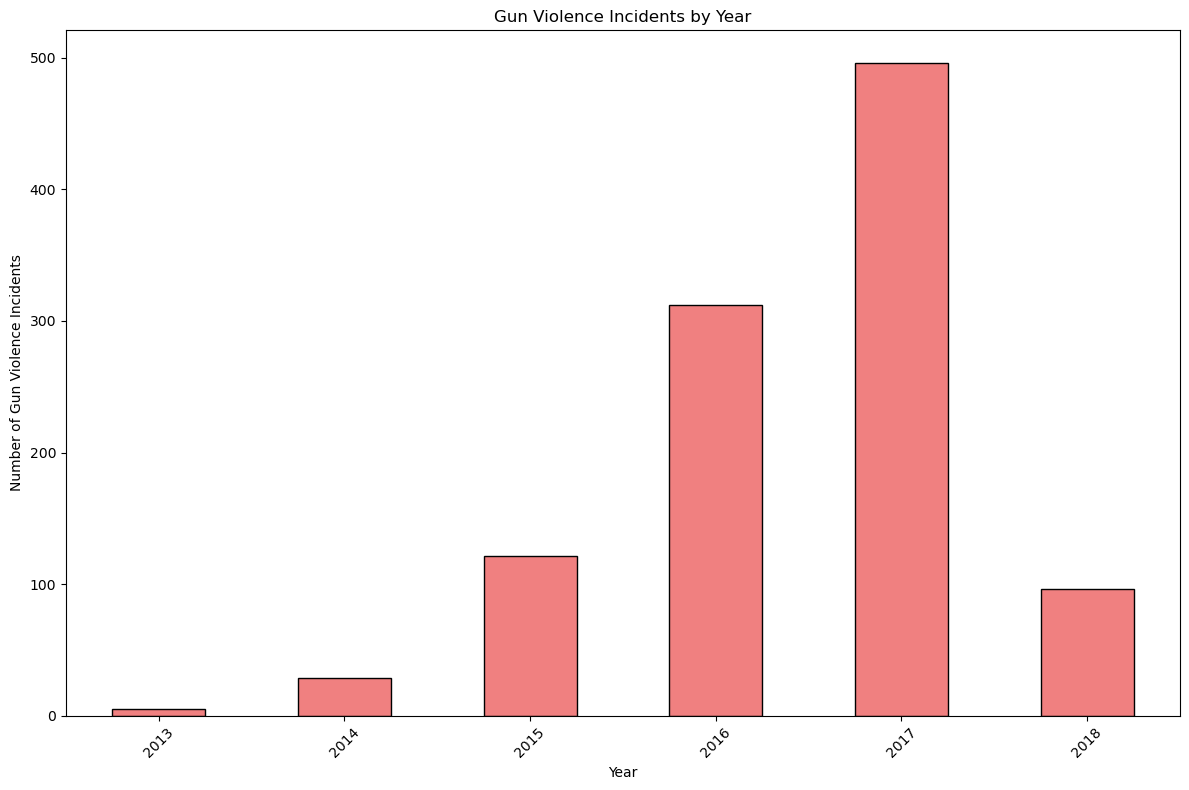

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure that 'Date' is in datetime format
gun_violence_df['Date'] = pd.to_datetime(gun_violence_df['Date'], errors='coerce')

# Extract the year from the 'Date' column
gun_violence_df['Year'] = gun_violence_df['Date'].dt.year

# Group by year and count the number of incidents
yearly_incidents = gun_violence_df['Year'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 8))
yearly_incidents.plot(kind='bar', color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Gun Violence Incidents')
plt.title('Gun Violence Incidents by Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


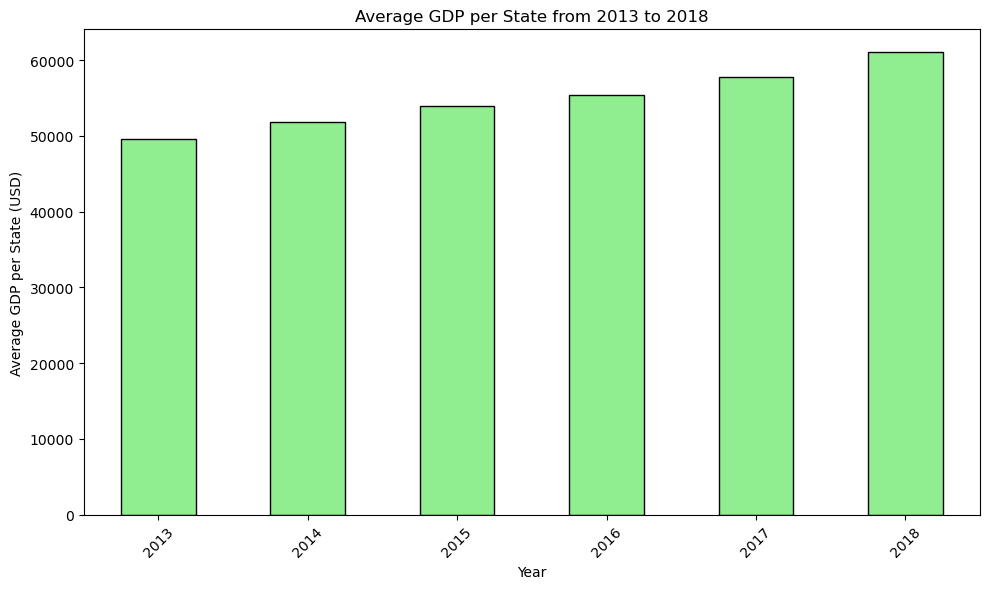

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the `gdp_by_state_df` DataFrame contains columns for years from 2013 to 2017
# Extract the columns corresponding to the years 2013 to 2017, and also the 'State' column
years = ['2013', '2014', '2015', '2016', '2017','2018']
gdp_per_state = gdp_by_state_df[['GeoName'] + years]

# Calculate the average GDP for each year across all states
average_gdp_by_year = gdp_per_state[years].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
average_gdp_by_year.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average GDP per State (USD)')
plt.title('Average GDP per State from 2013 to 2018')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [152]:
# Ensure GeoName exists and filter GDP data for 2013-2017
print(gdp_by_state_df.columns)  # Verify column names

# Select relevant columns ('GeoName' and the years 2013-2017)
years = ['2013', '2014', '2015', '2016', '2017']
gdp_by_state_filtered = gdp_by_state_df[['GeoName'] + years]

# Rename 'GeoName' to 'State' for consistency
gdp_by_state_filtered.rename(columns={'GeoName': 'State'}, inplace=True)

# Set 'State' as index and reshape the DataFrame to have one row per (State, Year)
gdp_by_state_filtered = gdp_by_state_filtered.set_index('State')
gdp_by_state_filtered = gdp_by_state_filtered.stack().reset_index(name='GDP')
gdp_by_state_filtered.columns = ['State', 'Year', 'GDP']


Index(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', 'Unit', 'GeoName',
       'Average_GDP'],
      dtype='object')


In [154]:

# Convert 'Date' column to datetime format if it's not already
gun_violence_df['Date'] = pd.to_datetime(gun_violence_df['Date'], errors='coerce')

# Extract the year from the 'Date' column
gun_violence_df['Year'] = gun_violence_df['Date'].dt.year.astype(str)

# Filter for the years 2013-2017
years = ['2013', '2014', '2015', '2016', '2017']
gun_violence_filtered = gun_violence_df[gun_violence_df['Year'].isin(years)]

# Group by 'State' and 'Year' and aggregate gun violence data
gun_violence_by_state = gun_violence_filtered.groupby(['State', 'Year']).agg({
    'No_of_Killed': 'sum',
    'No_of_Injured': 'sum'
}).reset_index()


In [155]:
# Merge gun violence data with GDP data based on 'State' and 'Year'
merged_data = pd.merge(gun_violence_by_state, gdp_by_state_filtered, on=['State', 'Year'], how='inner')


In [156]:
# Calculate the correlation between gun violence and GDP
correlation = merged_data[['No_of_Killed', 'No_of_Injured', 'GDP']].corr()
print(correlation)


               No_of_Killed  No_of_Injured       GDP
No_of_Killed       1.000000       0.810476  0.126790
No_of_Injured      0.810476       1.000000  0.094371
GDP                0.126790       0.094371  1.000000


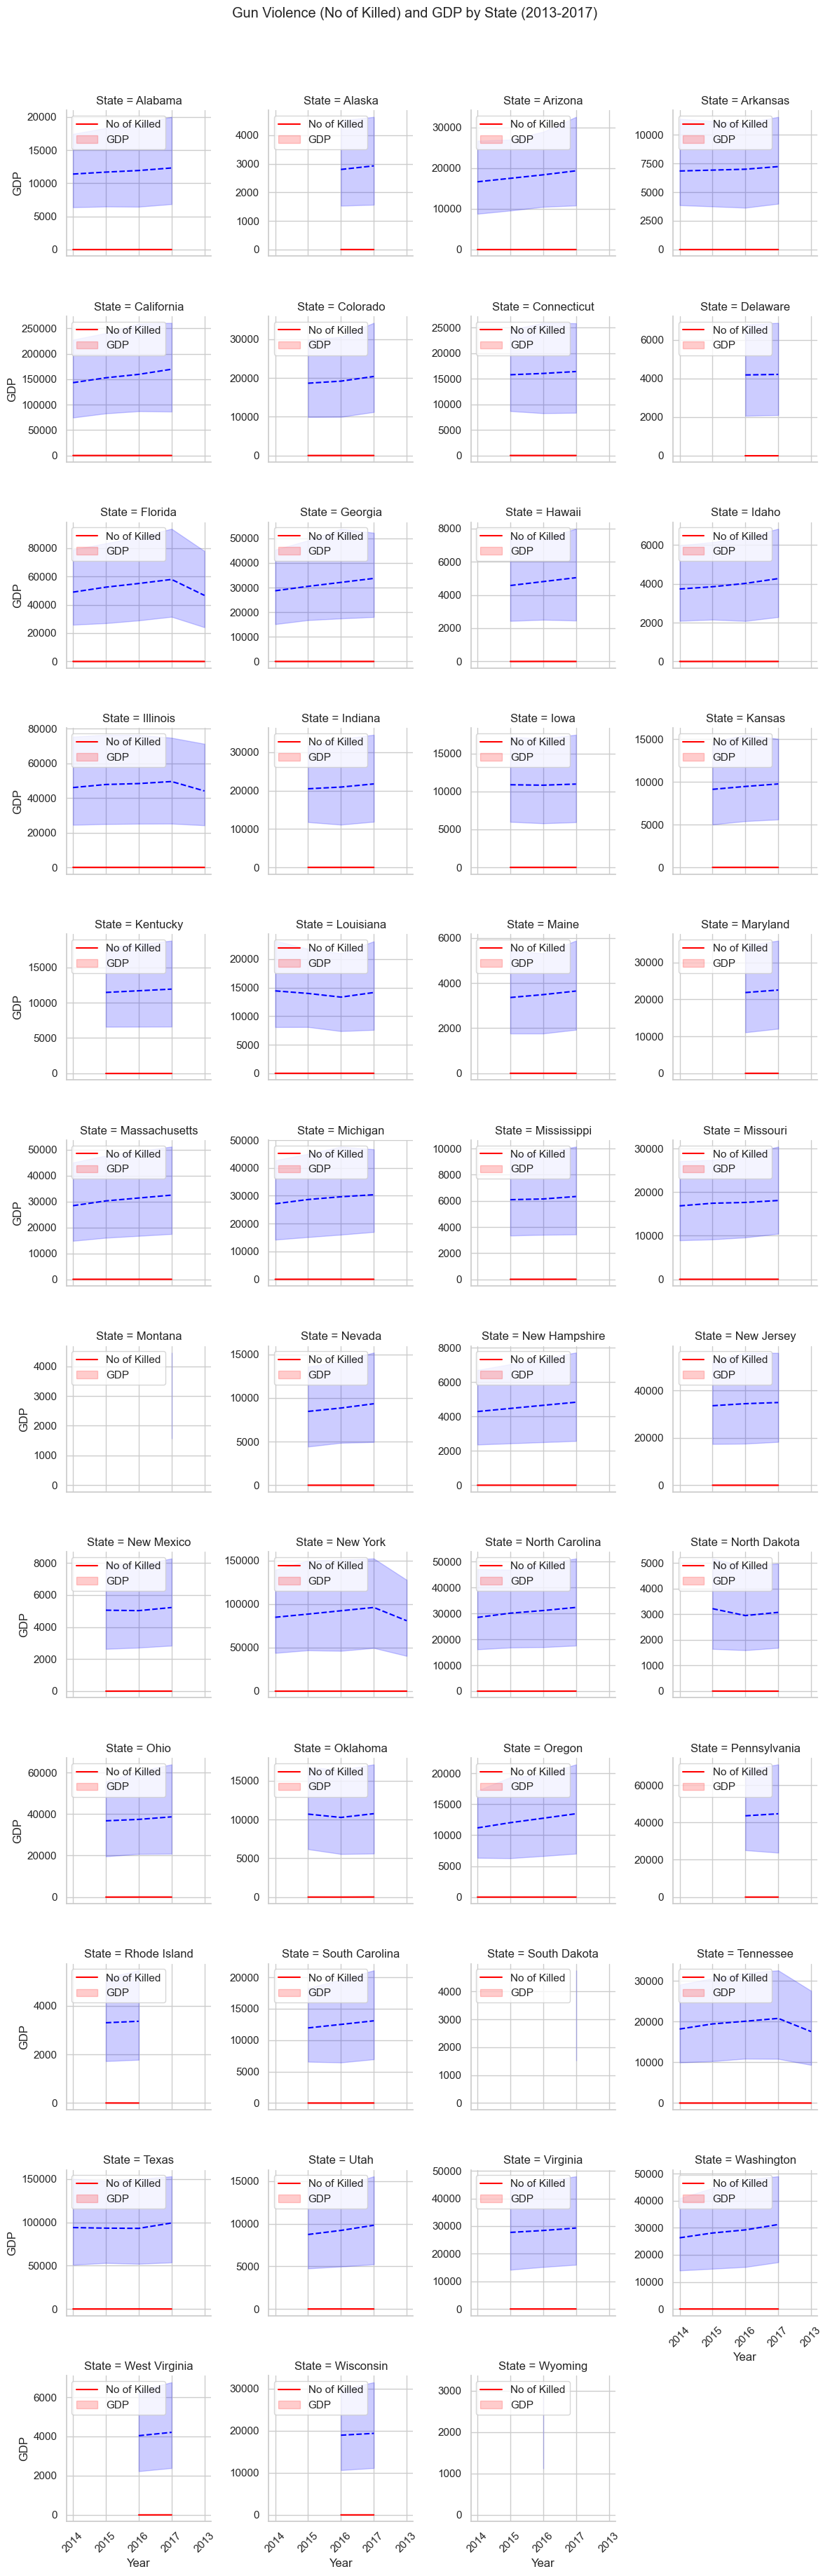

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create a grid of line plots: one for each state
g = sns.FacetGrid(merged_data, col="State", col_wrap=4, height=3, sharey=False, sharex=True)
g.map(sns.lineplot, "Year", "No_of_Killed", label="No of Killed", color="red")
g.map(sns.lineplot, "Year", "GDP", label="GDP", color="blue", linestyle='--')

# Add legends and titles to each subplot
for ax in g.axes.flat:
    ax.legend(["No of Killed", "GDP"], loc="upper left")
    ax.set_xticks(merged_data['Year'].unique())  # Ensure the x-axis matches unique years
    ax.set_xticklabels(merged_data['Year'].unique(), rotation=45)

# Set overall title
g.fig.suptitle("Gun Violence (No of Killed) and GDP by State (2013-2017)", y=1.02)

# Adjust layout
g.fig.tight_layout()
plt.show()


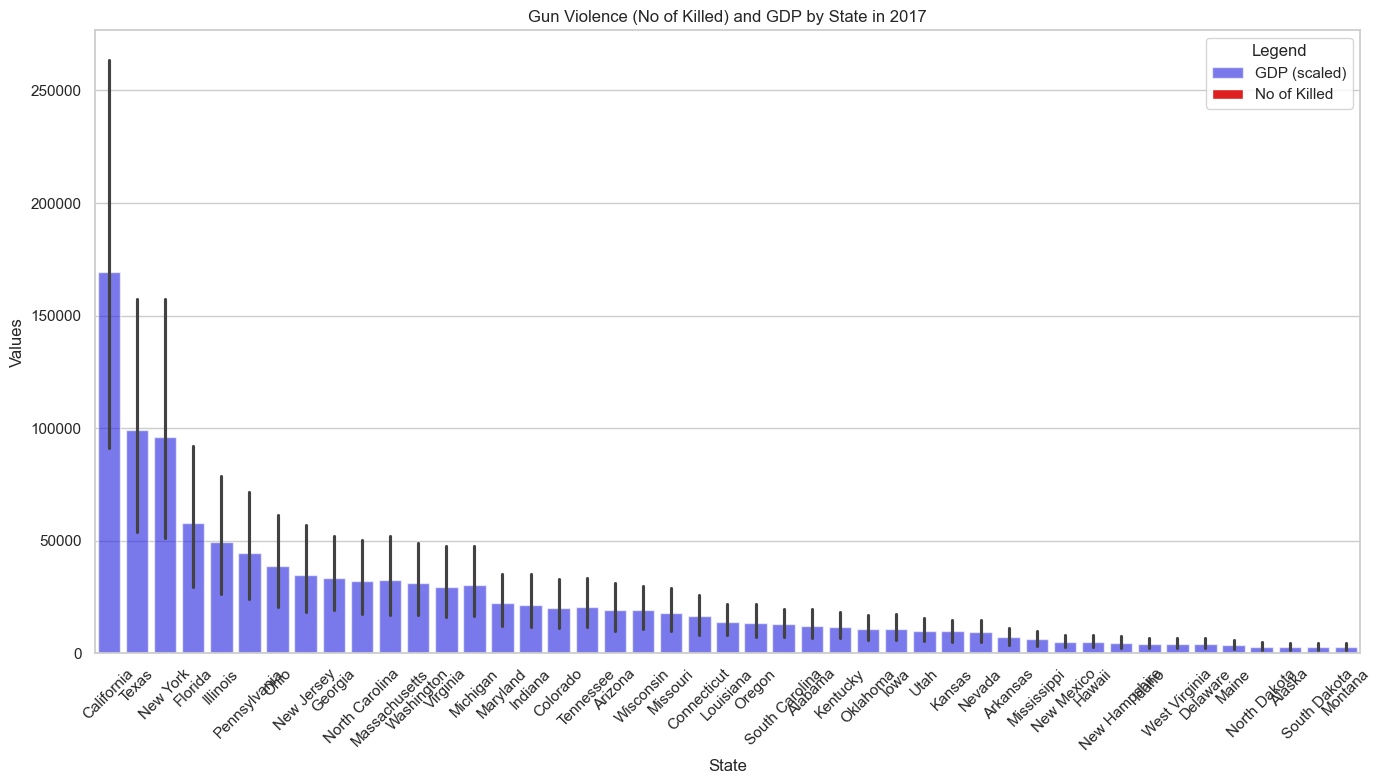

In [177]:
# Filter data for a specific year (e.g., 2017)
year_to_plot = "2017"
data_for_year = merged_data[merged_data["Year"] == year_to_plot]

# Sort data by GDP for better visualization
data_for_year = data_for_year.sort_values(by="GDP", ascending=False)

# Create the plot
plt.figure(figsize=(14, 8))

# Plot GDP as blue bars (scaled down for better comparison)
sns.barplot(
    data=data_for_year,
    x="State",
    y="GDP",
    color="blue",
    alpha=0.6,
    label="GDP (scaled)"
)

# Overlay "No of Killed" as red bars
sns.barplot(
    data=data_for_year,
    x="State",
    y="No_of_Killed",
    color="red",
    label="No of Killed"
)

# Add plot details
plt.title(f"Gun Violence (No of Killed) and GDP by State in {year_to_plot}")
plt.xlabel("State")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend(title="Legend", loc="upper right")
plt.tight_layout()

# Show the plot
plt.show()


Index(['State', 'No_of_Killed', 'Year', 'GDP_per_capita'], dtype='object')


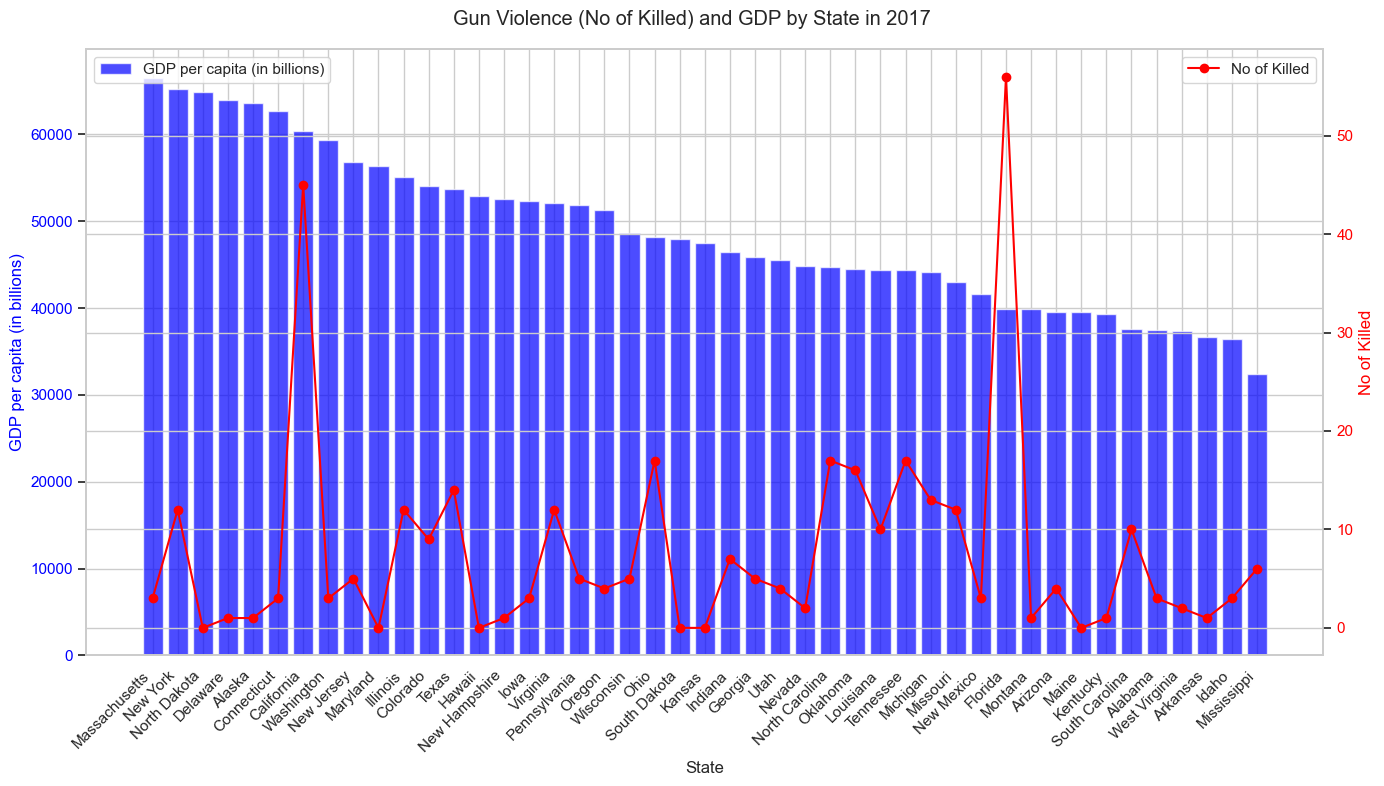

In [208]:
# Step 1: Reshape the gdp_per_capita_df to have a "Year" column
gdp_per_capita_long = gdp_per_capita_df.melt(id_vars=['State'], value_vars=['2013', '2014', '2015', '2016', '2017'], 
                                             var_name='Year', value_name='GDP_per_capita')

# Step 2: Merge GDP per capita data with gun violence data
merged_data = pd.merge(gun_violence_for_year, gdp_per_capita_long, on="State", how='inner')

# Step 3: Verify that the 'Year' column exists in merged_data
print(merged_data.columns)  # Check if 'Year' is in the DataFrame

# Step 4: Filter data for the specific year (e.g., 2017)
year_to_plot = "2017"
data_for_year = merged_data[merged_data["Year"] == year_to_plot]

# Step 5: Sort data by GDP for better visualization
data_for_year = data_for_year.sort_values(by="GDP_per_capita", ascending=False)

# Step 6: Create the figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Step 7: Plot GDP as bars
ax1.bar(
    data_for_year["State"],
    data_for_year["GDP_per_capita"],
    color="blue",
    alpha=0.7,
    label="GDP per capita (in billions)"
)
ax1.set_xlabel("State")
ax1.set_ylabel("GDP per capita (in billions)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Step 8: Create a second y-axis for No of Killed
ax2 = ax1.twinx()
ax2.plot(
    data_for_year["State"],
    data_for_year["No_of_Killed"],
    color="red",
    marker="o",
    label="No of Killed"
)
ax2.set_ylabel("No of Killed", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Step 9: Add title and legend
fig.suptitle(f"Gun Violence (No of Killed) and GDP by State in {year_to_plot}")
ax1.set_xticklabels(data_for_year["State"], rotation=45, ha="right")
fig.tight_layout()

# Step 10: Add a combined legend
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Step 11: Show the plot
plt.show()


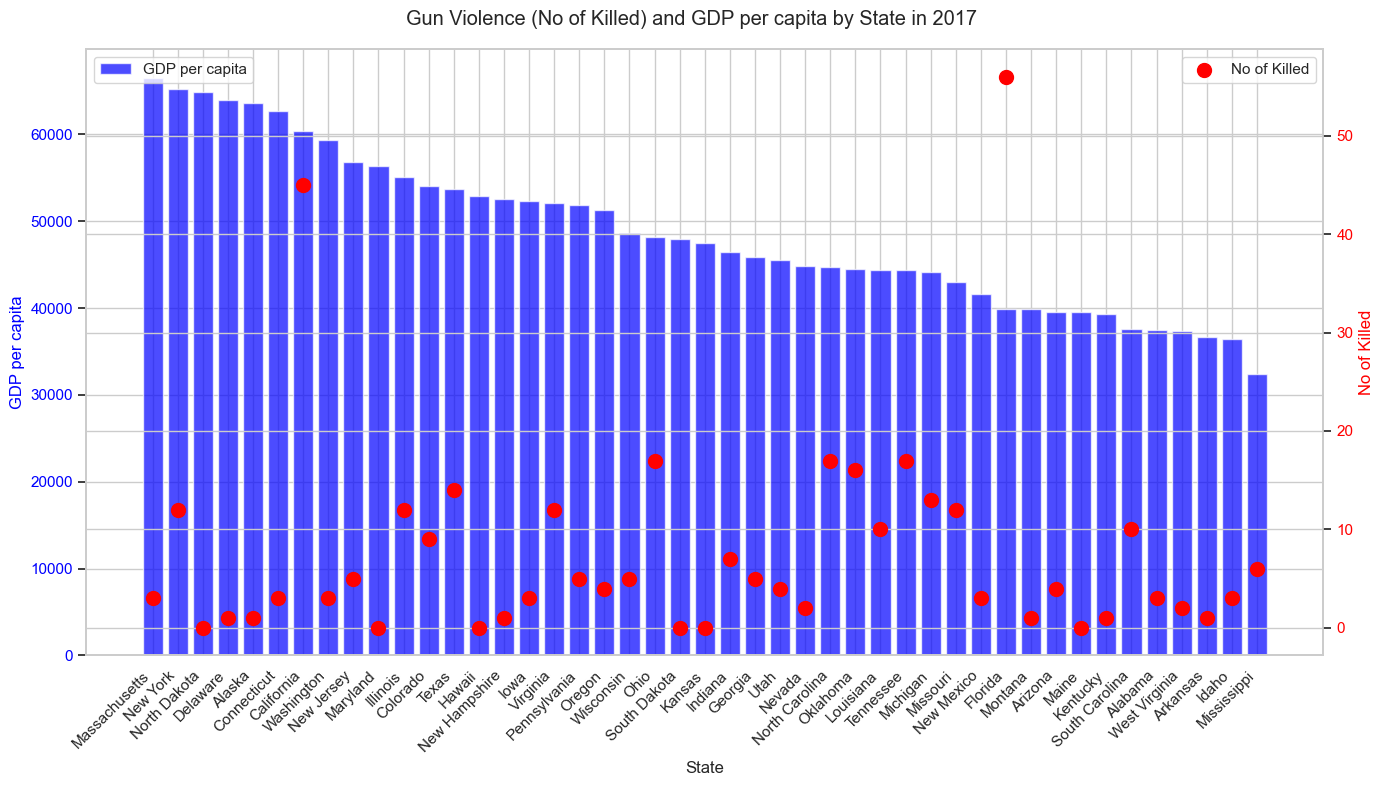

In [197]:
# Reshape the gdp_per_capita_df to have a "Year" column and remove duplicates
gdp_per_capita_long = gdp_per_capita_df.melt(id_vars=['State'], value_vars=['2013', '2014', '2015', '2016', '2017'], 
                                             var_name='Year', value_name='GDP_per_capita')

# Convert 'Year' column to string for comparison
gdp_per_capita_long['Year'] = gdp_per_capita_long['Year'].astype(str)

# Now filter data for the year we want (e.g., 2017)
gdp_per_capita_for_year = gdp_per_capita_long[gdp_per_capita_long["Year"] == year_to_plot]

# Group data by State and aggregate "GDP per capita" (sum ensures no duplicates)
gdp_per_capita_for_year = gdp_per_capita_for_year.groupby('State').agg({
    'GDP_per_capita': 'sum'
}).reset_index()

# Remove duplicates in gun violence data
gun_violence_for_year = gun_violence_for_year.groupby('State').agg({
    'No_of_Killed': 'sum'
}).reset_index()

# Merge the two datasets (gun violence and GDP per capita) ensuring no duplicates
merged_data = pd.merge(gun_violence_for_year, gdp_per_capita_for_year, on="State", how='inner')

# Sort the data by GDP per capita for better visualization
merged_data = merged_data.sort_values(by="GDP_per_capita", ascending=False)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot GDP per capita as bars
ax1.bar(
    merged_data["State"],
    merged_data["GDP_per_capita"],
    color="blue",
    alpha=0.7,
    label="GDP per capita"
)
ax1.set_xlabel("State")
ax1.set_ylabel("GDP per capita", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis for No of Killed
ax2 = ax1.twinx()
ax2.scatter(
    merged_data["State"],
    merged_data["No_of_Killed"],
    color="red",
    label="No of Killed",
    s=100  # Size of the markers
)
ax2.set_ylabel("No of Killed", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Add title and legend
fig.suptitle(f"Gun Violence (No of Killed) and GDP per capita by State in {year_to_plot}")
ax1.set_xticklabels(merged_data["State"], rotation=45, ha="right")
fig.tight_layout()

# Add a combined legend
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()


In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have gun_violence_for_year, gdp_by_state_df, and gdp_per_capita_df dataframes

# Rename 'GeoName' to 'State' in gdp_by_state_df to match gun_violence_for_year dataframe
gdp_by_state_df.rename(columns={'GeoName': 'State'}, inplace=True)

# Merge gun violence data and GDP data based on 'State'
merged_data = pd.merge(gun_violence_for_year, gdp_by_state_df, on="State", how="inner")

# Merge the combined data with GDP per capita data
merged_data = pd.merge(merged_data, gdp_per_capita_df, on="State", how="inner")

# Check the merged data
print(merged_data.head())



     State  No_of_Killed      1997      1998      1999      2000      2001  \
0  Alabama             3  104716.9  110181.3  115833.1  120132.9  123035.3   
1  Alabama             3   87489.8   92256.0   97079.7  100767.1  103191.7   
2  Alabama             3    1771.3    1849.9    1903.4    1730.4    1988.9   
3  Alabama             3    1365.4    1435.5    1490.6    1318.5    1594.9   
4  Alabama             3     405.9     414.4     412.8     411.9     394.0   

       2002      2003      2004  ...      2018      2019  \
0  128117.4  133969.3  146886.7  ...  221030.7  228142.6   
1  106833.8  111367.7  123086.0  ...  184432.7  189941.9   
2    1588.0    2175.0    2925.3  ...    2475.4    1936.0   
3    1201.1    1756.2    2419.2  ...    1834.7    1255.8   
4     386.9     418.8     506.2  ...     640.7     680.2   

                          Unit  Average_GDP_x  2013_y  2014_y  2015_y  2016_y  \
0  Millions of current dollars  162883.195455   36674   36473   36818   37158   
1  Milli

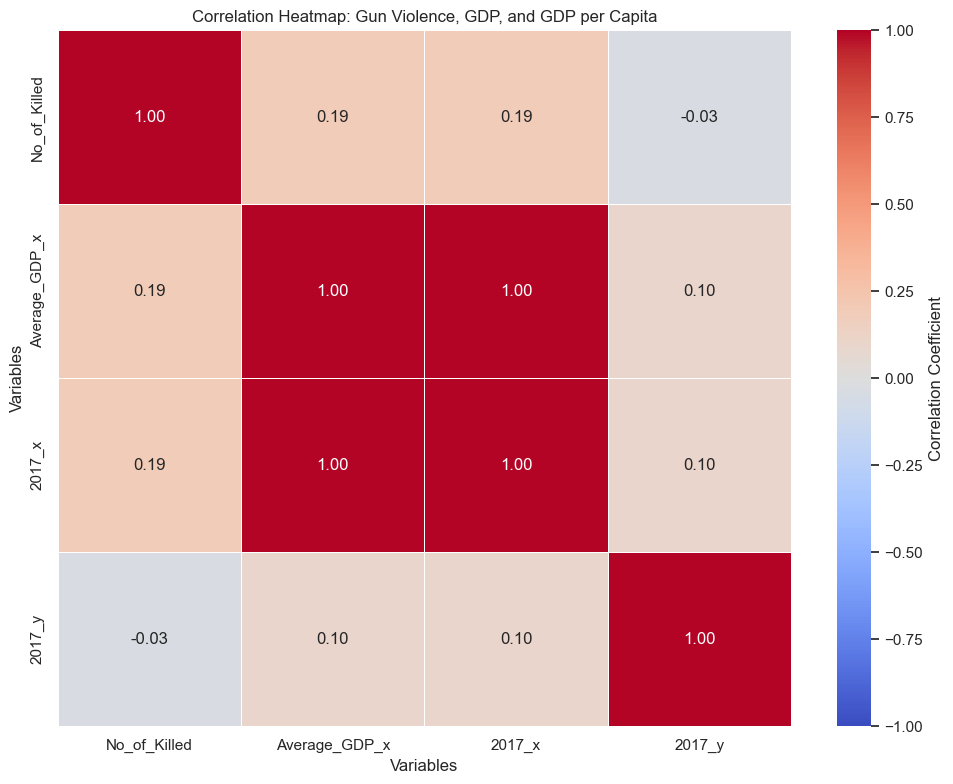

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# Perform correlation calculation with correct column names
correlation = merged_data[['No_of_Killed', 'Average_GDP_x', '2017_x', '2017_y']].corr()

# Create the heatmap with customizations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'}, vmin=-1, vmax=1)

# Customize plot labels
plt.title('Correlation Heatmap: Gun Violence, GDP, and GDP per Capita')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the heatmap
plt.tight_layout()
plt.show()


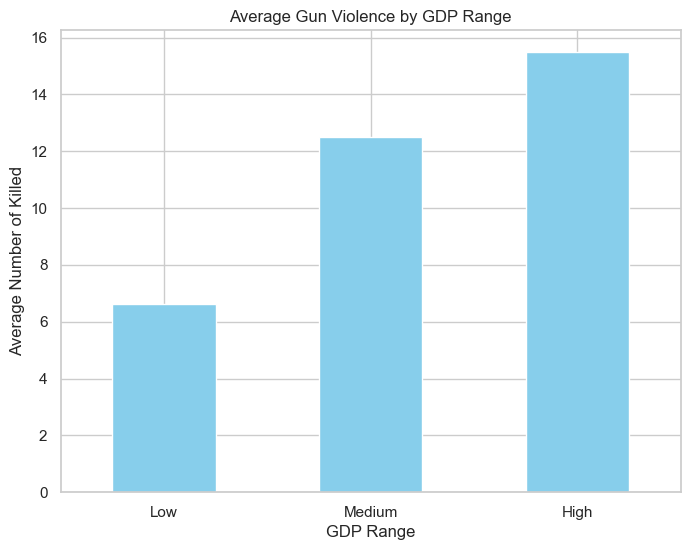

In [221]:
# Define GDP ranges
gdp_ranges = ['Low', 'Medium', 'High']
gdp_bins = [0, 20000, 50000, float('inf')]  # You can adjust the ranges
merged_data['GDP_Range'] = pd.cut(merged_data['Average_GDP_x'], bins=gdp_bins, labels=gdp_ranges)

# Calculate average gun violence (No_of_Killed) by GDP range
avg_violence_by_gdp = merged_data.groupby('GDP_Range')['No_of_Killed'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_violence_by_gdp.plot(kind='bar', color='skyblue')
plt.title('Average Gun Violence by GDP Range')
plt.xlabel('GDP Range')
plt.ylabel('Average Number of Killed')
plt.xticks(rotation=0)
plt.show()


In [226]:
# Rename columns that end with '_x' and '_y' to just the year (remove '_x' and '_y')
renamed_columns = {}
for col in merged_data.columns:
    if col.endswith('_x') or col.endswith('_y'):
        year = col.split('_')[0]  # Extract the year part
        renamed_columns[col] = year  # Assign just the year as the new column name

# Rename the columns in the DataFrame
merged_data = merged_data.rename(columns=renamed_columns)

# Verify the new column names
print(merged_data.columns)


Index(['State', 'No_of_Killed', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Unit',
       'Average', '2013', '2014', '2015', '2016', '2017', 'Average',
       'GDP_Range'],
      dtype='object')


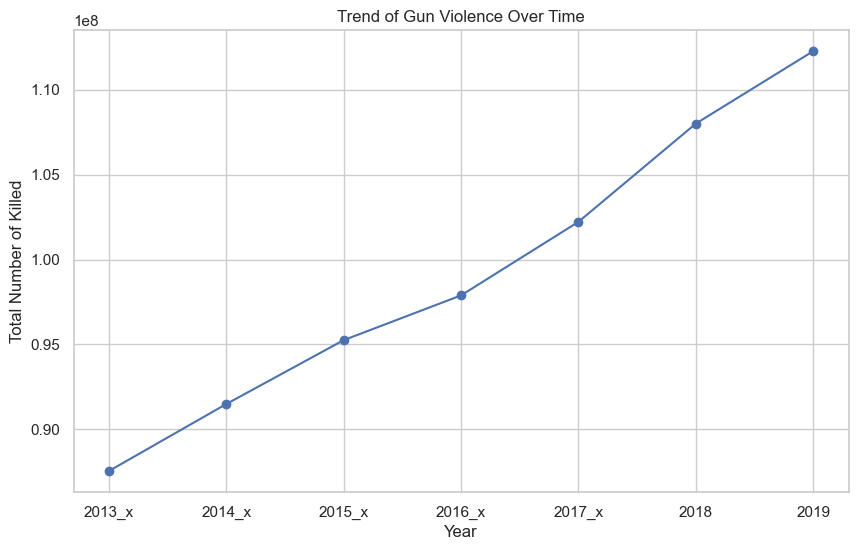

In [231]:
# Plot trend for the number of killings by year
plt.figure(figsize=(10, 6))
merged_data_years.sum(axis=0).plot(kind='line', color='b', marker='o')
plt.title('Trend of Gun Violence Over Time')
plt.xlabel('Year')
plt.ylabel('Total Number of Killed')
plt.grid(True)
plt.show()


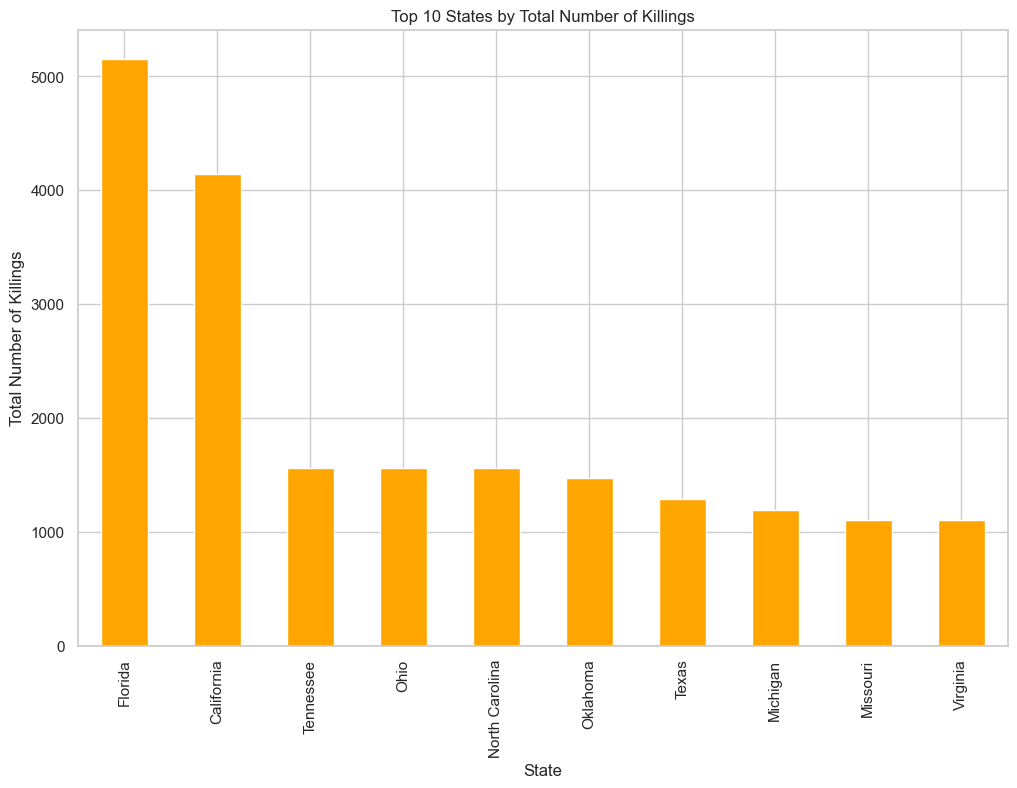

In [240]:
# Bar plot for total number of killings by state
total_killings_by_state = merged_data.groupby('State')['No_of_Killed'].sum()

plt.figure(figsize=(12, 8))
total_killings_by_state.sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Top 10 States by Total Number of Killings')
plt.xlabel('State')
plt.ylabel('Total Number of Killings')
plt.xticks(rotation=90)
plt.show()
